# Dictionary Learning

## Collect faces data

In [ ]:
from sklearn.decomposition import DictionaryLearning
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

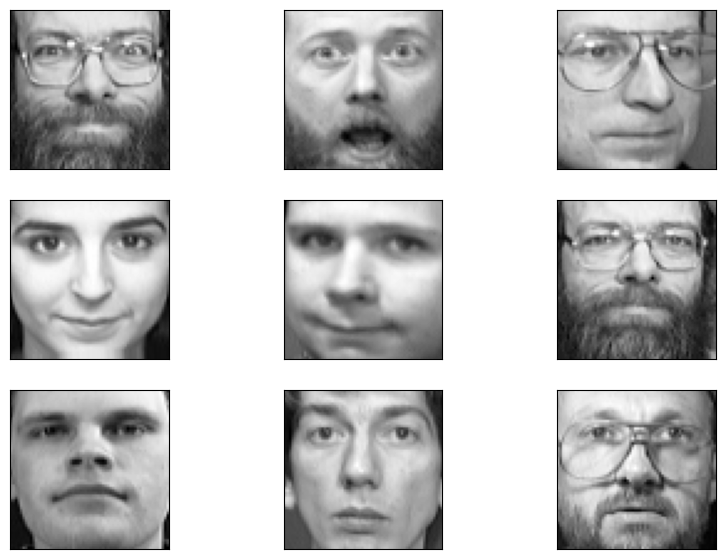

In [ ]:
plt.figure(figsize=(10, 7))
for i, face in enumerate(random.choices(faces.images, k=9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(face, cmap="gray")
    plt.xticks(())
    plt.yticks(())

## Create a DL Model

In [ ]:
num_samples, m1, m2 = faces.images.shape

In [ ]:
X = faces.images.reshape((num_samples, -1))

In [ ]:
n_atoms = 64
n_iter = 30
dl_model = DictionaryLearning(n_components=n_atoms, alpha=1.8, max_iter=n_iter)
dl_model.fit(X)

DictionaryLearning(alpha=1.8, max_iter=30, n_components=64)

In [ ]:
dictionary = dl_model.components_
sparse_codes = dl_model.transform(X)

/Users/akhilvempali/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/decomposition/_dict_learning.py:193: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


## Observations

### Dictionary 

Learnt dictionary

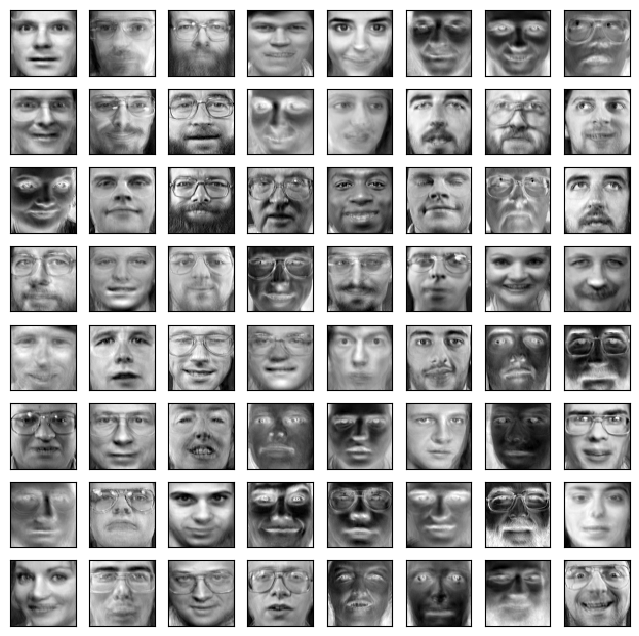

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(n_atoms):
    plt.subplot(8, 8, i + 1)
    plt.imshow(dictionary[i].reshape((64, 64)), cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

### For any 1 picture, activations of different atoms

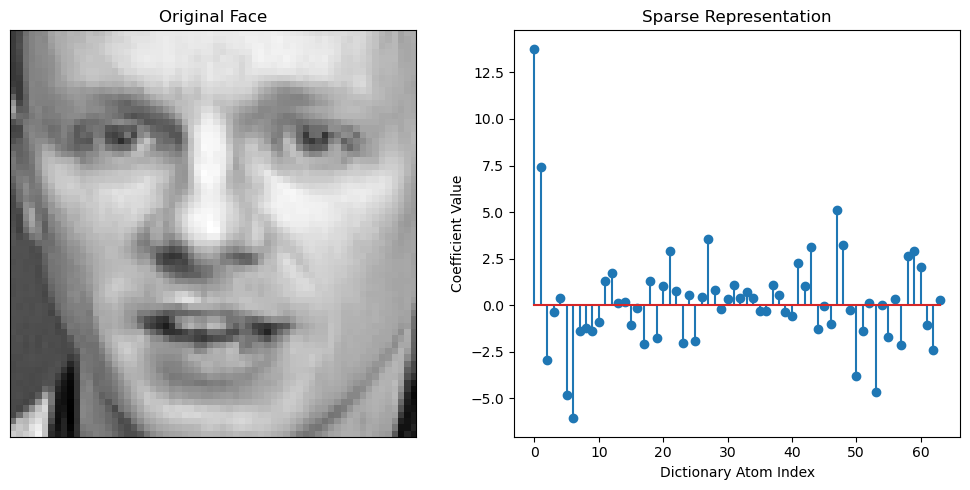

In [ ]:
plt.figure(figsize=(10, 5))
n_faces_to_plot = 1
for i in range(n_faces_to_plot):
    plt.subplot(n_faces_to_plot, 2, i * 2 + 1)
    plt.imshow(faces.images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Original Face')
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(n_faces_to_plot, 2, i * 2 + 2)
    plt.stem(sparse_codes[i])
    plt.title('Sparse Representation')
    plt.xlabel('Dictionary Atom Index')
    plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

### For any random atom, samples which have highest activation as that atom

In [ ]:
most_activated_atoms_for_each_face = np.argmax(sparse_codes, axis=1)
rand_atom = 4
ixs = [i for i, a in enumerate(most_activated_atoms_for_each_face) if a==rand_atom]
print(f"{rand_atom=} and faces with most active atom as rand_atom {ixs=}")

rand_atom=4 and faces with most active atom as rand_atom ixs=[7, 89, 173, 176, 269, 288, 343, 346]


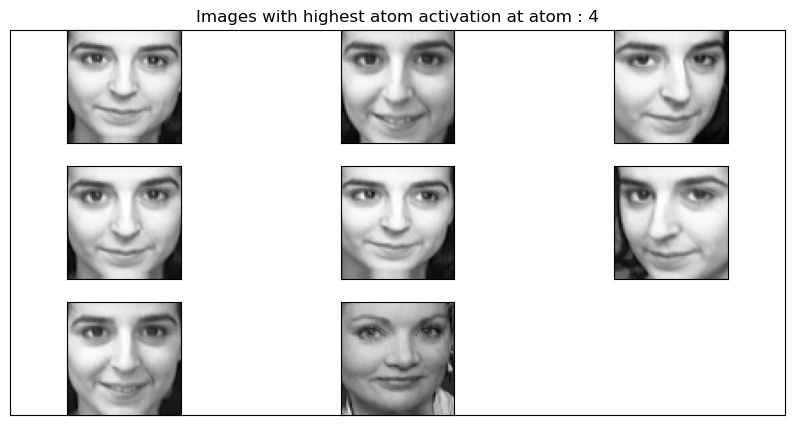

In [ ]:
plt.figure(figsize=(10, 5))
plt.title(f'Images with highest atom activation at atom : {rand_atom}')
plt.xticks(()); plt.yticks(())
for i, im_ix in enumerate(ixs[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(faces.images[im_ix], cmap="gray")
    plt.xticks(()); plt.yticks(())